In [1]:
'''
1. Predict wine type
2. Predict wine quality rating
'''

'\n1. Predict wine type\n2. Predict wine quality rating\n'

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [3]:
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')

red_wine['wine_type'] = 'red'   # add a column for the type
white_wine['wine_type'] = 'white'
wines = pd.concat([red_wine, white_wine])
wines['quality_label'] = wines['quality'].apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [4]:
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   

   alcohol  quality wine_type quality_label  
0     12.2        8     white          high  
1      9.9        5       red           low  
2     12.0        7     white        medium  
3      9.5        6     white        medium  
4      8.9        6     white        medium

# Predicting Wine Types

In [5]:
wtp_features = wines.iloc[:,: -3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(wines['wine_type'])

wtp_train_X, wtp_test_X, wtp_train_y, wtp_test_y = train_test_split(wtp_features, wtp_class_labels, 
                                                                    test_size=0.3, random_state=42)
print(Counter(wtp_train_y), Counter(wtp_test_y))
print('Features:', list(wtp_feature_names))

Counter({'white': 3418, 'red': 1129}) Counter({'white': 1480, 'red': 470})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [6]:
wtp_ss = StandardScaler().fit(wtp_train_X)

wtp_train_SX = wtp_ss.transform(wtp_train_X)

wtp_test_SX = wtp_ss.transform(wtp_test_X)

## Train using Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
wtp_lr_predictions = wtp_lr.predict(wtp_test_SX)

meu.display_model_performance_metrics(true_labels = wtp_test_y,
                                      predicted_labels = wtp_lr_predictions,
                                      classes = ['red', 'white'])


Model Performance metrics:
------------------------------
Accuracy: 0.9923
Precision: 0.9923
Recall: 0.9923
F1 Score: 0.9923

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        red       0.98      0.99      0.98       470
      white       1.00      0.99      0.99      1480

avg / total       0.99      0.99      0.99      1950


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red          463     7
        white          8  1472


## Train using Deep Learning (MLP)

In [10]:
le = LabelEncoder()
le.fit(wtp_train_y)

wtp_train_ey = le.transform(wtp_train_y)
wtp_test_ey = le.transform(wtp_test_y)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
wtp_dnn_model = Sequential()
wtp_dnn_model.add(Dense(16, activation = 'relu', input_shape = (11,)))
wtp_dnn_model.add(Dense(16, activation = 'relu'))
wtp_dnn_model.add(Dense(16, activation = 'relu'))
wtp_dnn_model.add(Dense(1, activation = 'sigmoid'))

wtp_dnn_model.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'],
                     )

In [13]:
history = wtp_dnn_model.fit(wtp_train_SX, wtp_train_ey,
                            epochs = 10, batch_size = 5,
                            shuffle = True, validation_split = 0.1,
                            verbose = 1)


Train on 4092 samples, validate on 455 samples
Epoch 1/10
4092/4092 [==============================] - 2s 392us/step - loss: 0.1296 - acc: 0.9587 - val_loss: 0.0142 - val_acc: 1.0000
Epoch 2/10
4092/4092 [==============================] - 1s 324us/step - loss: 0.0327 - acc: 0.9927 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 3/10
4092/4092 [==============================] - 1s 303us/step - loss: 0.0278 - acc: 0.9939 - val_loss: 0.0086 - val_acc: 0.9978
Epoch 4/10
4092/4092 [==============================] - 1s 301us/step - loss: 0.0251 - acc: 0.9956 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 5/10
4092/4092 [==============================] - 1s 281us/step - loss: 0.0229 - acc: 0.9963 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 6/10
4092/4092 [==============================] - 1s 276us/step - loss: 0.0209 - acc: 0.9963 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 7/10
4092/4092 [==============================] - 1s 274us/step - loss: 0.0197 - acc: 0.9971 - val_loss: 0.0015 - val_acc: 1.0000
E

In [14]:
wtp_dnn_ypred = wtp_dnn_model.predict_classes(wtp_test_SX)
wtp_dnn_predictions = le.inverse_transform(wtp_dnn_ypred)

meu.display_model_performance_metrics(true_labels = wtp_test_y,
                                      predicted_labels = wtp_dnn_predictions,
                                      classes = ['red', 'white'])

Model Performance metrics:
------------------------------
Accuracy: 0.9938
Precision: 0.9939
Recall: 0.9938
F1 Score: 0.9938

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        red       1.00      0.98      0.99       470
      white       0.99      1.00      1.00      1480

avg / total       0.99      0.99      0.99      1950


Prediction Confusion Matrix:
------------------------------
              Predicted:      
                     red white
Actual: red          460    10
        white          2  1478


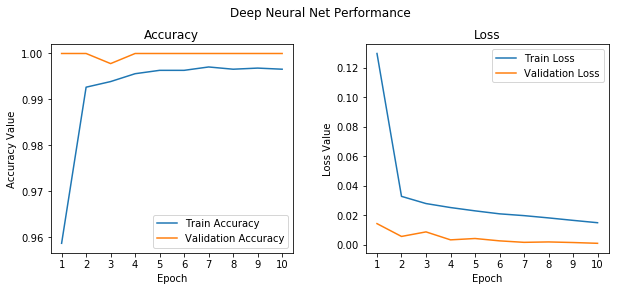

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,11))
ax1.plot(epochs, history.history['acc'], label='Train Accuracy')
ax1.plot(epochs, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [16]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

[11/11] features ████████████████████ Time elapsed: 0 seconds

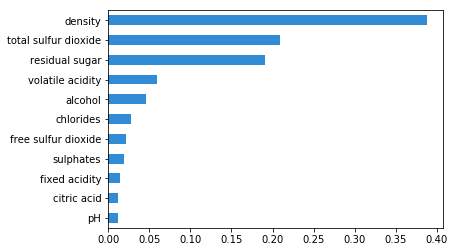

In [17]:
wtp_interpreter = Interpretation(wtp_test_SX, 
                                 feature_names = wtp_features.columns)
wtp_im_model = InMemoryModel(wtp_lr.predict_proba,
                             examples = wtp_train_SX,
                             target_names = wtp_lr.classes_)
plots = wtp_interpreter.feature_importance.plot_feature_importance(wtp_im_model,
                                                                  ascending = False)

density, total sulfur dioxide, and residual sugar are the top three features that contributed toward classifying wine samples as red or white

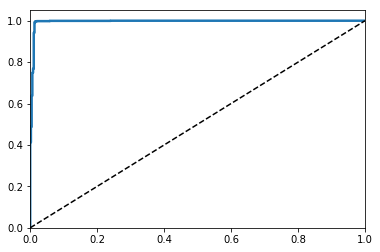

In [18]:
meu.plot_model_roc_curve(wtp_lr, wtp_test_SX, wtp_test_y)

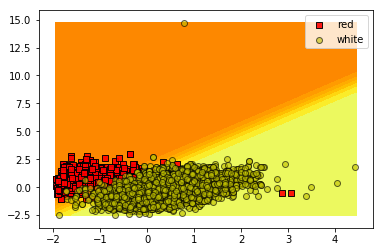

In [19]:
feature_indices = [i for i, feature in enumerate(wtp_feature_names) 
                   if feature in ['density', 'total sulfur dioxide']]

meu.plot_model_decision_surface(clf = wtp_lr, 
                                train_features = wtp_train_SX[:, feature_indices],
                                train_labels = wtp_train_y,
                                plot_step = 0.02,
                                cmap = plt.cm.Wistia_r,
                                markers = [',', 'o'],
                                alphas = [0.9, 0.6],
                                colors = ['r', 'y'])

# Predicting Wine Quality

In [20]:
wqp_features = wines.iloc[:, : -3]
wqp_feature_names = list(wqp_features.columns)

wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = ['low', 'medium', 'high']

wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
                                                                    wqp_class_labels,
                                                                    test_size = 0.3,
                                                                    random_state = 42)

print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)

Counter({'medium': 2737, 'low': 1666, 'high': 144}) Counter({'medium': 1178, 'low': 718, 'high': 54})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [21]:
wqp_ss = StandardScaler().fit(wqp_train_X)

wqp_train_SX = wqp_ss.transform(wqp_train_X)

wqp_test_SX = wqp_ss.transform(wqp_test_X)

## Train using Logistic Regression

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
wqp_dt = DecisionTreeClassifier()
wqp_dt.fit(wqp_train_SX, wqp_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

meu.display_model_performance_metrics(true_labels = wqp_test_y,
                                      predicted_labels = wqp_dt_predictions,
                                      classes = wqp_label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7323
Precision: 0.7335
Recall: 0.7323
F1 Score: 0.7328

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        low       0.69      0.68      0.68       718
     medium       0.78      0.79      0.78      1178
       high       0.26      0.30      0.28        54

avg / total       0.73      0.73      0.73      1950


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           486    226    6
        medium        213    926   39
        high            4     34   16


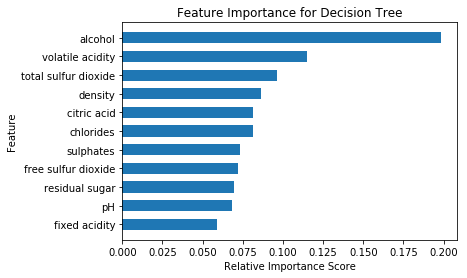

In [25]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names, wqp_dt_feature_importances), 
                                                          key = lambda x : x[1]))

y_position = list(range(len(wqp_dt_feature_names)))

plt.barh(y_position, wqp_dt_feature_scores, height = 0.6, align = 'center')
plt.yticks(y_position, wqp_dt_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importance for Decision Tree')

Conclusion:

1) Compared to our previous model of wine type, the most important features are Alcohol and volatile acidity.

2) The feature of total sulfur dioxide seems to be one of the most important features for classifying both wine type and quality.

In [26]:
from graphviz import Source
from sklearn import tree
from IPython.display import Image

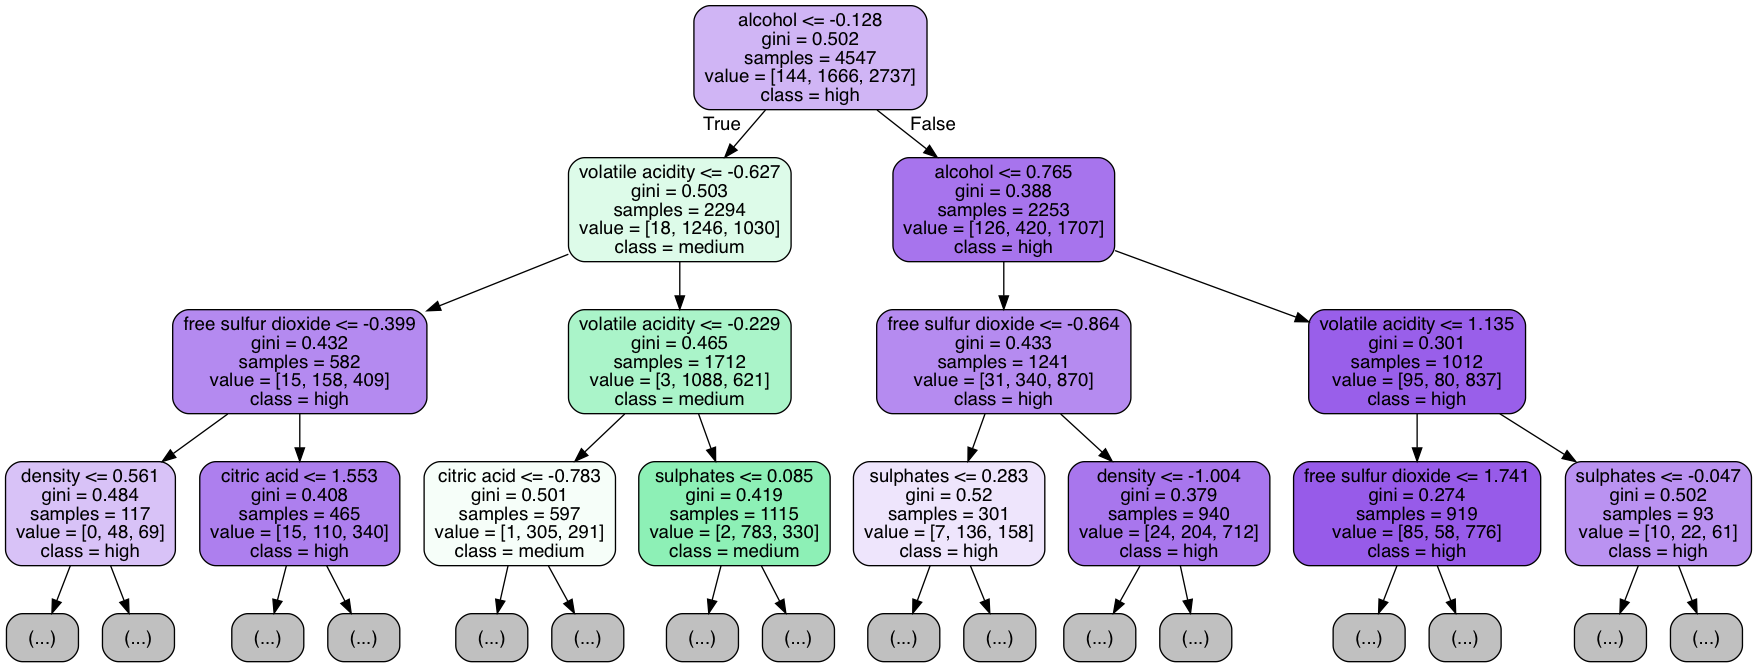

In [27]:
graph = Source(tree.export_graphviz(wqp_dt, out_file = None,
                                   class_names = wqp_label_names,
                                   filled = True,
                                   rounded = True,
                                   special_characters = False,
                                   feature_names = wqp_feature_names,
                                   max_depth = 3))
png_data = graph.pipe(format = 'png')

with open('dtree_structure.png', 'wb') as f:
    f.write(png_data)
Image(png_data)

# Ensemble

## Bagging

### Train, Predict & Evaluate Model using Random Forests

Random forests, a very popular bagging method:

1) each base learner is a decision tree model

2) the split is chosen from a random subset of features

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
wqp_rf = RandomForestClassifier()
wqp_rf.fit(wqp_train_SX, wqp_train_y)

wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)

meu.display_model_performance_metrics(true_labels = wqp_test_y,
                                      predicted_labels = wqp_rf_predictions,
                                      classes = wqp_label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7795
Precision: 0.7799
Recall: 0.7795
F1 Score: 0.7766

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        low       0.72      0.75      0.74       718
     medium       0.82      0.82      0.82      1178
       high       0.75      0.28      0.41        54

avg / total       0.78      0.78      0.78      1950


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           541    177    0
        medium        209    964    5
        high            0     39   15


In [30]:
print(wqp_rf.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': 1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'n_estimators': [100, 200, 300, 500],
              'max_features': ['auto', None, 'log2']
             }

In [33]:
wqp_clf = GridSearchCV(RandomForestClassifier(random_state=42), 
                       param_grid, cv=5, scoring = 'accuracy')
wqp_clf.fit(wqp_train_SX, wqp_train_y)

print(wqp_clf.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


In [34]:
results = wqp_clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], 
                                       results['mean_test_score'],
                                       results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'max_features': 'auto', 'n_estimators': 100} 0.7928 0.0119
{'max_features': 'auto', 'n_estimators': 200} 0.7955 0.0101
{'max_features': 'auto', 'n_estimators': 300} 0.7941 0.0086
{'max_features': 'auto', 'n_estimators': 500} 0.795 0.0094
{'max_features': None, 'n_estimators': 100} 0.7847 0.0144
{'max_features': None, 'n_estimators': 200} 0.781 0.0149
{'max_features': None, 'n_estimators': 300} 0.784 0.0128
{'max_features': None, 'n_estimators': 500} 0.7858 0.0107
{'max_features': 'log2', 'n_estimators': 100} 0.7928 0.0119
{'max_features': 'log2', 'n_estimators': 200} 0.7955 0.0101
{'max_features': 'log2', 'n_estimators': 300} 0.7941 0.0086
{'max_features': 'log2', 'n_estimators': 500} 0.795 0.0094


### Train, Predict & Evaluate Random Forest Model with tuned hyperparameters

In [35]:
wqp_rf = RandomForestClassifier(n_estimators = 200, 
                                max_features = 'auto',
                                random_state = 42)
wqp_rf.fit(wqp_train_SX, wqp_train_y)

wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)

meu.display_model_performance_metrics(true_labels = wqp_test_y,
                                      predicted_labels = wqp_rf_predictions,
                                      classes = wqp_label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.8108
Precision: 0.8114
Recall: 0.8108
F1 Score: 0.8053

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        low       0.80      0.73      0.76       718
     medium       0.82      0.89      0.85      1178
       high       0.88      0.28      0.42        54

avg / total       0.81      0.81      0.81      1950


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           522    196    0
        medium        132   1044    2
        high            0     39   15


## Boosting

### Train, Predict & Evaluate Random Forest Model with Extreme Gradient Boosting

In [36]:
# Load and set dependencies
import os

mingw_path = r'C:\mingw-w64\mingw64\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [37]:
import xgboost as xgb

In [38]:
# train the model on tuned hyperparameters
wqp_xgb_model = xgb.XGBClassifier(seed=42)
wqp_xgb_model.fit(wqp_train_SX, wqp_train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)

In [39]:
# predict and evaluation
wqp_xgb_predictions = wqp_xgb_model.predict(wqp_test_SX)

meu.display_model_performance_metrics(true_labels=wqp_test_y, 
                                      predicted_labels=wqp_xgb_predictions, 
                                      classes=wqp_label_names)


Model Performance metrics:
------------------------------
Accuracy: 0.7446
Precision: 0.7443
Recall: 0.7446
F1 Score: 0.7344

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        low       0.71      0.64      0.67       718
     medium       0.76      0.84      0.80      1178
       high       0.83      0.09      0.17        54

avg / total       0.74      0.74      0.73      1950


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           456    261    1
        medium        187    991    0
        high            1     48    5


In [40]:
param_grid = {'n_estimators': [100, 200, 300, 500],
              'max_depth': [5, 10, 15],
              'learning_rate': [0.3, 0.5]
             }
wqp_clf = GridSearchCV(xgb.XGBClassifier(tree_method='exact',
                                         seed=42), 
                       param_grid, cv=5, scoring = 'accuracy')
wqp_clf.fit(wqp_train_SX, wqp_train_y)

print(wqp_clf.best_params_)

{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 100}


In [41]:
results = wqp_clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], 
                                       results['mean_test_score'],
                                       results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100} 0.7779 0.0118
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200} 0.7799 0.0066
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300} 0.7788 0.0091
{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 500} 0.7766 0.0088
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 100} 0.7871 0.0048
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 200} 0.7845 0.0051
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 300} 0.7799 0.0026
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 500} 0.7792 0.0027
{'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 100} 0.7823 0.0107
{'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 200} 0.7818 0.0105
{'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 300} 0.7805 0.0112
{'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 500} 0.7794 0.0107
{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100} 0.7781 0.0123
{'learning_rate': 0.5, 'max_de

### Train, Predict & Evaluate Extreme Gradient Boosted Model with tuned hyperparameters

In [44]:
wqp_xgb_model = xgb.XGBClassifier(seed=42, 
                                  n_estimators = 100,
                                  max_depth = 10,
                                  learning_rate = 0.3)

wqp_xgb_model.fit(wqp_train_SX, wqp_train_y)

wqp_xgb_predictions = wqp_xgb_model.predict(wqp_test_SX)

meu.display_model_performance_metrics(true_labels = wqp_test_y,
                                      predicted_labels = wqp_xgb_predictions,
                                      classes = wqp_label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7887
Precision: 0.7891
Recall: 0.7887
F1 Score: 0.7841

Model Classification report:
------------------------------
             precision    recall  f1-score   support

        low       0.75      0.71      0.73       718
     medium       0.81      0.86      0.83      1178
       high       0.89      0.30      0.44        54

avg / total       0.79      0.79      0.78      1950


Prediction Confusion Matrix:
------------------------------
               Predicted:            
                      low medium high
Actual: low           511    207    0
        medium        165   1011    2
        high            3     35   16


## Model interpretation

### Comparative analysis of Model Feature importances

In [46]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [49]:
interpreter = Interpretation(wqp_test_SX, feature_names = wqp_feature_names)
wqp_im_model = InMemoryModel(wqp_rf.predict_proba,
                             examples = wqp_train_SX,
                             target_names = wqp_rf.classes_)

wqp_rf_feature_importances = wqp_rf.feature_importances_
wqp_rf_feature_names, wqp_rf_feature_scores = zip(*sorted(zip(wqp_feature_names, wqp_rf_feature_importances),
                                                         key = lambda x: x[1]))


[11/11] features ████████████████████ Time elapsed: 0 seconds

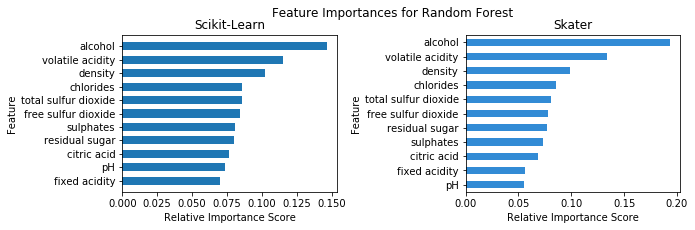

In [50]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (10, 3))
t = f.suptitle('Feature Importances for Random Forest', fontsize = 12)

f.subplots_adjust(top = 0.85, wspace = 0.6)
y_position = list(range(len(wqp_rf_feature_names)))
ax1.barh(y_position, wqp_rf_feature_scores, 
         height = 0.6, align = 'center',
         tick_label = wqp_rf_feature_names)
ax1.set_title('Scikit-Learn')
ax1.set_xlabel('Relative Importance Score')
ax1.set_ylabel('Feature')


plots = interpreter.feature_importance.plot_feature_importance(wqp_im_model,
                                                               ascending = False,
                                                               ax = ax2)
ax2.set_title('Skater')
ax2.set_xlabel('Relative Importance Score')
ax2.set_ylabel('Feature')

Observation:

1) The most two important features are consistent across the two plots, i.e. alcohol and volatile acidity

### View Model ROC Curve

two aggregation metrics for computing the average ROC measures

1) Micro-averaging involves plotting an ROC curve over the entire prediction space
2) Macro-averaging involves giving equal weight to each class label when averaging.

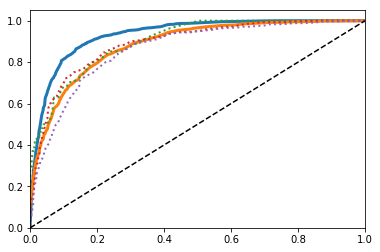

In [59]:
meu.plot_model_roc_curve(wqp_rf, wqp_test_SX, wqp_test_y)

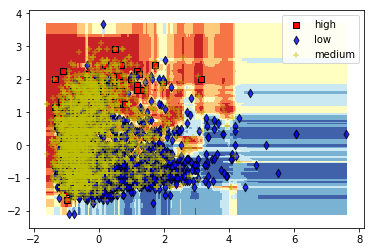

In [62]:
feature_indices = [i for i, feature in enumerate(wqp_feature_names) if feature in ['alcohol', 'volatile acidity']]

meu.plot_model_decision_surface(clf = wqp_rf, 
                                train_features = wqp_train_SX[:,feature_indices],
                                train_labels = wqp_train_y, 
                                plot_step = 0.02,
                                cmap=plt.cm.RdYlBu,
                                markers = [',','d','+'],
                                alphas = [1.0, 0.8, 0.5],
                                colors = ['r', 'b', 'y'])


## Interpret model predictions

In [63]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

In [64]:
exp = LimeTabularExplainer(wqp_train_SX, 
                           feature_names = wqp_feature_names,
                           discretize_continuous = True,
                           class_names = wqp_rf.classes_)

In [65]:
exp.explain_instance(wqp_test_SX[10], wqp_rf.predict_proba, top_labels = 1).show_in_notebook()

In [66]:
exp.explain_instance(wqp_test_SX[747], wqp_rf.predict_proba, top_labels = 1).show_in_notebook()

partial dependence helps describe the marginal impact or influence of a feature on the model prediction decision by holding the other features constant

## partial dependencies

[81/81] grid cells ████████████████████ Time elapsed: 5 seconds

[(0, 1), (0, 1), (0, 1)]

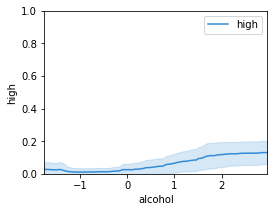

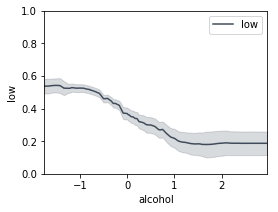

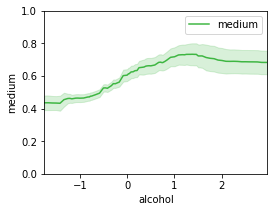

In [67]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(['alcohol'], 
                                                                   wqp_im_model, 
                                                                   grid_resolution = 100,
                                                                   with_variance = True,
                                                                   figsize = (4, 3))
axs = axes_list[0][3:]
[ax.set_ylim(0, 1) for ax in axs]

[4698/4698] grid cells ████████████████████ Time elapsed: 43 seconds

[(0, 1), (0, 1), (0, 1)]

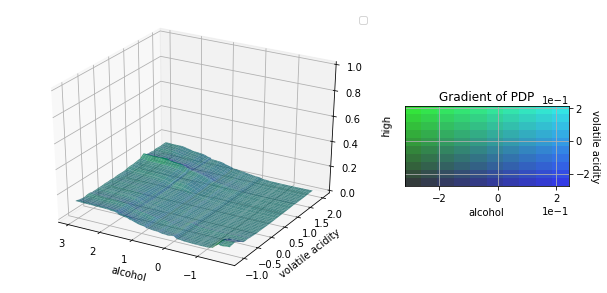

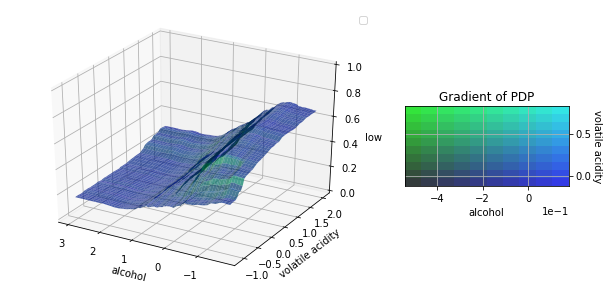

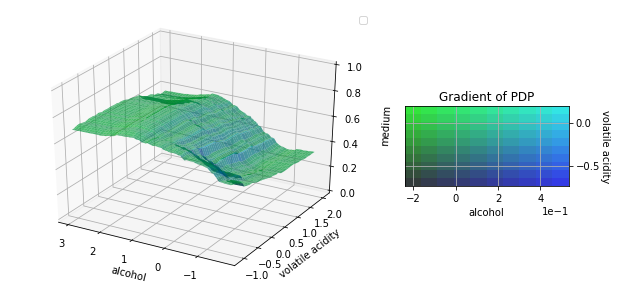

In [68]:
axes_list = interpreter.partial_dependence.plot_partial_dependence([('alcohol','volatile acidity')], 
                                                                   wqp_im_model, 
                                                                   grid_resolution = 100,
                                                                   n_samples=1000,
                                                                   figsize = (10, 5))
axs = axes_list[0][3:]
[ax.set_zlim(0, 1) for ax in axs]